In [1]:
# Importazione delle librerie necessarie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Caricamento del dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Creazione di un DataFrame per una migliore visualizzazione
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Visualizzazione delle prime righe del DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [2]:
# Divisione del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

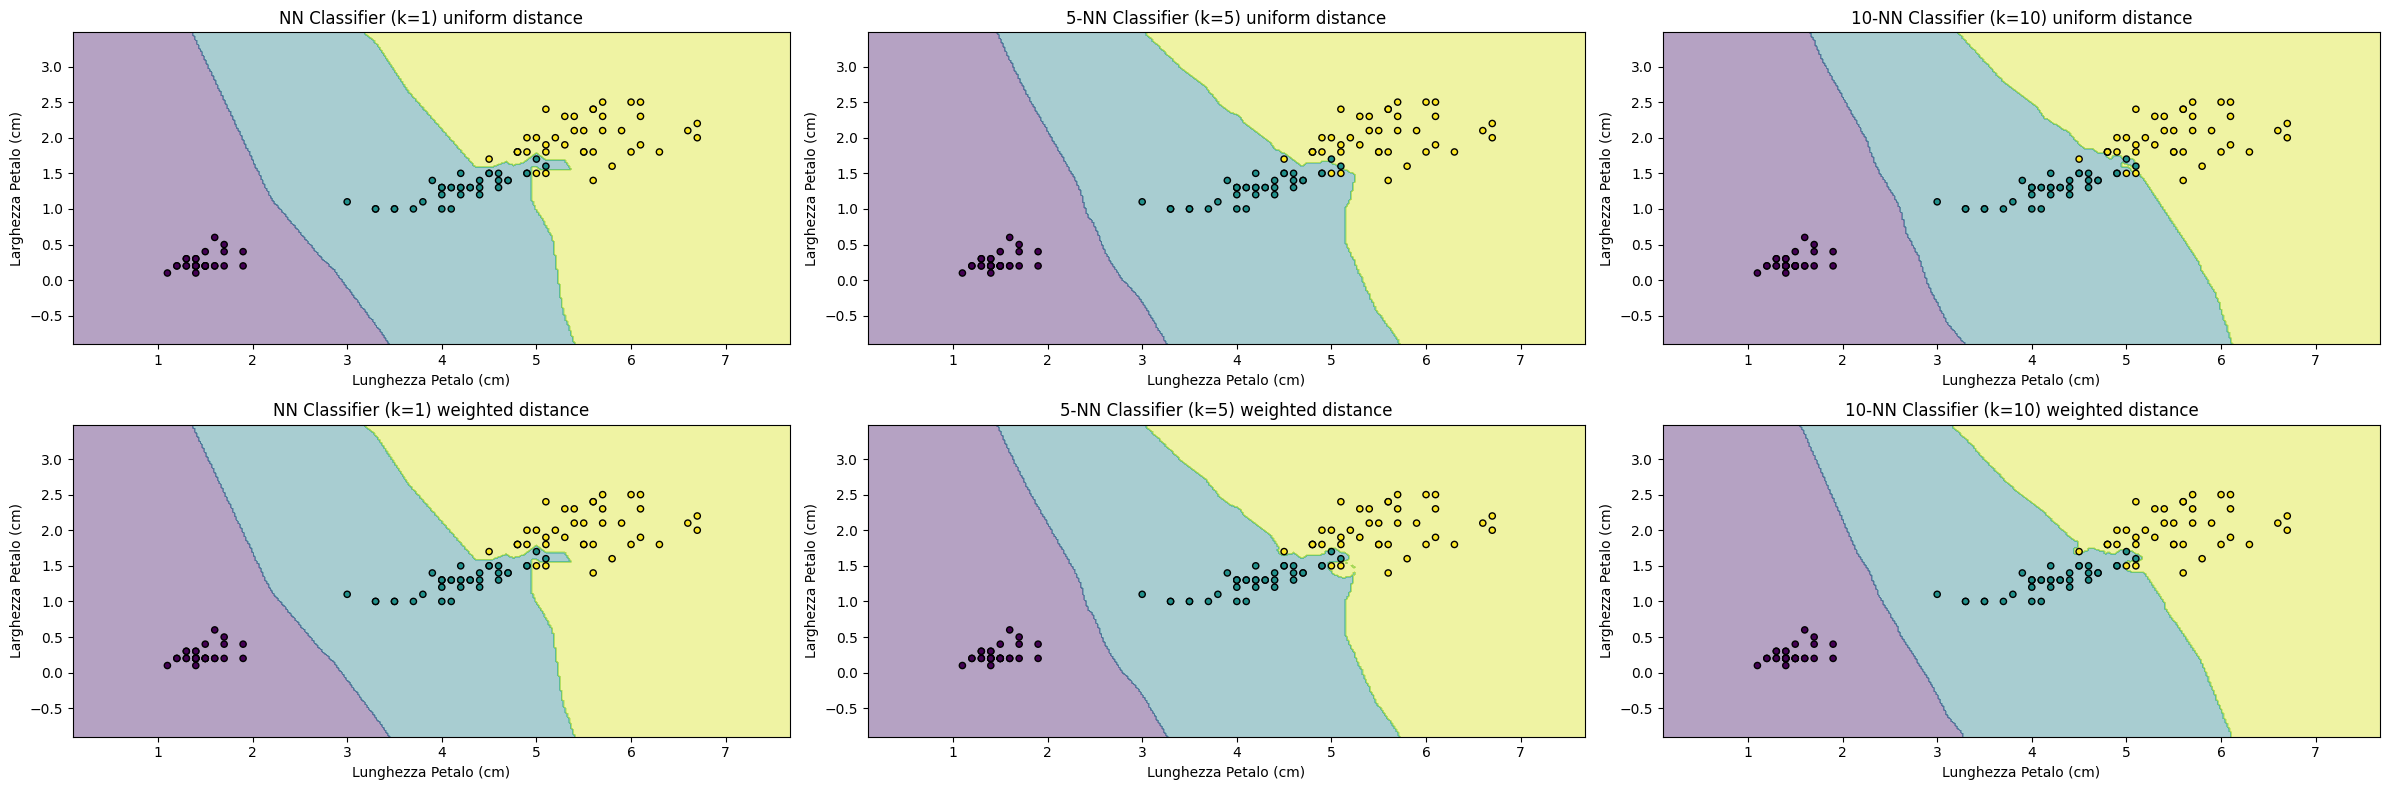

In [3]:
# Caricamento del dataset Iris
iris = load_iris()
X = iris.data[:, 2:]  # Utilizziamo solo le prime due caratteristiche per una visualizzazione 2D
y = iris.target

# Divisione del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creazione del modello k-NN con vari valori di k a distanza uniform
u_knn1 = KNeighborsClassifier(n_neighbors=1,   weights='uniform', n_jobs=-1)
u_knn5 = KNeighborsClassifier(n_neighbors=5,   weights='uniform', n_jobs=-1)
u_knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform', n_jobs=-1)

# Creazione del modello k-NN con vari valori di k a distanza weighted
w_knn1 = KNeighborsClassifier(n_neighbors=1,   weights='distance', n_jobs=-1)
w_knn5 = KNeighborsClassifier(n_neighbors=5,   weights='distance', n_jobs=-1)
w_knn10 = KNeighborsClassifier(n_neighbors=10, weights='distance', n_jobs=-1)

# Addestramento dei modelli
u_knn1.fit(X_train,  y_train)
u_knn5.fit(X_train,  y_train)
u_knn10.fit(X_train, y_train)
w_knn1.fit(X_train,  y_train)
w_knn5.fit(X_train,  y_train)
w_knn10.fit(X_train, y_train)


# Nomi degli assi
xlabel = 'Lunghezza Petalo (cm)'
ylabel = 'Larghezza Petalo (cm)'

# Definizione della funzione per tracciare le decision boundaries
def plot_decision_boundaries(X, y, model, ax, title):
    h = .02  # Passo della mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# Creazione della figura
fig, axes = plt.subplots(2, 3, figsize=(24, 8))

# Plot dei dati originali
#axes[0].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
#axes[0].set_title('The Data')

# Plot delle decision boundaries per k=1 uniform distance
plot_decision_boundaries(X_train, y_train, u_knn1, axes[0][0],  'NN Classifier (k=1) uniform distance')

# Plot delle decision boundaries per k=5 uniform distance
plot_decision_boundaries(X_train, y_train, u_knn5, axes[0][1],  '5-NN Classifier (k=5) uniform distance')

# Plot delle decision boundaries per k=10 uniform distance
plot_decision_boundaries(X_train, y_train, u_knn10, axes[0][2], '10-NN Classifier (k=10) uniform distance')

# Plot delle decision boundaries per k=1 weighted distance
plot_decision_boundaries(X_train, y_train, w_knn1, axes[1][0],  'NN Classifier (k=1) weighted distance')

# Plot delle decision boundaries per k=5 weighted distance
plot_decision_boundaries(X_train, y_train, w_knn5, axes[1][1],  '5-NN Classifier (k=5) weighted distance')

# Plot delle decision boundaries per k=10 weighted distance
plot_decision_boundaries(X_train, y_train, w_knn10, axes[1][2], '10-NN Classifier (k=10) weighted distance')

plt.tight_layout()
plt.show()